# 1. Предобработка


Выберите набор данных из списка в конце задания. Обработайте данные в нём:

1. Обработайте недостающие данные в датасете - удалить/заменить/etc, обоснуйте своё решение
2. Постройте как минимум по 1 графику каждого типа из представленных на лекции. Для каждого построенного графика объясните почему отображённые данные лучше всего представимы именно этим типом графика
3. Сохраните датасет


4. Создайте новую колонку, отображающую характеристику набора данных. Новая колонка должна обладать смысловой нагрузкой.

    Например, для набора данных о прямоугольниках с двумя колонками width и height будет корректно придумать колонку perimeter или area, равную width * height. Некорректно будет придумать колонку width2, равную width * 2, потому что эта информация не будет нести полезную информацию о фигурах

Не оценивается баллами, но даёт очки уважения:
1. Выдвиньте 2 гипотезы о данных. Например, для датасета codeforces достаточно интересной гипотезой может быть "простые задачи (рейтинг меньше 1500) почти всегда решаются больше 5000 раз"


Наборы данных:

1. [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) - характеристики треков в spotify
2. [VKontakte Dataset of Users' Textual Data](https://www.kaggle.com/oldaandozerskaya/vkontakte-dataset-of-users-textual-data) 1. основная информация 10к профилей ВК
3. [Data Science for COVID-19](https://www.kaggle.com/kimjihoo/coronavirusdataset) - информация о распространении коронавируса в Южной Корее в 2020 году
4. [Dota 2 - Pro Players Matches Results 2019 ~ 2021](https://www.kaggle.com/devinanzelmo/dota-2-matches?select=player_ratings.csv) - информация матчей игроков DoTA 2. Если данные не влезают в память, можно воспользоваться [аналогом pandas](https://dask.org/) для обработки вне RAM
5. [GPS Data of Seabirds](https://www.kaggle.com/saurabhshahane/predicting-animal-behavior-using-gps) - данные о миграции птиц
6. [FAANG Historical Stock Price Data](https://www.kaggle.com/specter7/amazon-amzn-historical-stock-price-data) -  данные о биржевых котировках компаний FAANG c 2016 по 2021 год
7. [NBA 2k20 player dataset](https://www.kaggle.com/isaienkov/nba2k20-player-dataset) - информация об игроках NBA
8. [Anime dataset](https://www.kaggle.com/thunderz/anime-dataset?select=user_data.csv) - данные о просмотре аниме пользователями с сайта myAnimeList

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
!git clone https://github.com/mokaruuns/datasets.git

fatal: destination path 'datasets' already exists and is not an empty directory.


In [48]:
df = pd.read_csv('datasets/nba2k-full.csv')
df.sample(5)

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
244,Zach Collins,74,#33,Portland Trail Blazers,C,11/17/97,6-11 / 2.11,232 lbs. / 105.2 kg.,$4240200,USA,2017,1,10,Gonzaga,NBA2k20
155,Jakob Poeltl,77,#25,San Antonio Spurs,C-F,10/15/95,7-1 / 2.16,239 lbs. / 108.4 kg.,$3754885,Austria,2016,1,9,Utah,NBA2k20
407,Ignas Brazdeikis,70,#17,New York Knicks,F,01/08/99,6-6 / 1.98,216 lbs. / 98 kg.,$898310,Canada,2019,2,47,Michigan,NBA2k20
132,Terry Rozier,78,#3,Charlotte Hornets,G,03/17/94,6-1 / 1.85,190 lbs. / 86.2 kg.,$19894737,USA,2015,1,16,Louisville,NBA2k20
39,Jayson Tatum,85,#0,Boston Celtics,F,03/03/98,6-8 / 2.03,204 lbs. / 92.5 kg.,$7830000,USA,2017,1,3,Duke,NBA2k20


1. Проверим ячейки на содержание NaN - давайте заменим на строчки "missing_"
2. Конвертируем столбец b_date в datetime
3. Преобразовываем данные

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    439 non-null    object
 1   rating       439 non-null    int64 
 2   jersey       439 non-null    object
 3   team         416 non-null    object
 4   position     439 non-null    object
 5   b_day        439 non-null    object
 6   height       439 non-null    object
 7   weight       439 non-null    object
 8   salary       439 non-null    object
 9   country      439 non-null    object
 10  draft_year   439 non-null    int64 
 11  draft_round  439 non-null    object
 12  draft_peak   439 non-null    object
 13  college      370 non-null    object
 14  version      439 non-null    object
dtypes: int64(2), object(13)
memory usage: 51.6+ KB


In [50]:
df['team'] = df['team'].fillna('missing_')
df["college"] = df["college"].fillna("missing_")
df.b_day = pd.to_datetime(df.b_day, infer_datetime_format=True)
df.salary = df.salary.apply(lambda x: int(x[1:]))
df.loc[(df.draft_round == 'Undrafted'), ('draft_round', 'draft_peak')] = '0'
df.draft_round = df.draft_round.apply(lambda x: int(x))
df.draft_peak = df.draft_peak.apply(lambda x: int(x))
df.height = df.height.apply(lambda x: float(x.split('/')[1]))
df.weight = df.weight.apply(lambda x: float(x.split('/')[1].split()[0]))
df['bmi'] = df.weight / df.height.pow(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   full_name    439 non-null    object        
 1   rating       439 non-null    int64         
 2   jersey       439 non-null    object        
 3   team         439 non-null    object        
 4   position     439 non-null    object        
 5   b_day        439 non-null    datetime64[ns]
 6   height       439 non-null    float64       
 7   weight       439 non-null    float64       
 8   salary       439 non-null    int64         
 9   country      439 non-null    object        
 10  draft_year   439 non-null    int64         
 11  draft_round  439 non-null    int64         
 12  draft_peak   439 non-null    int64         
 13  college      439 non-null    object        
 14  version      439 non-null    object        
 15  bmi          439 non-null    float64       
dtypes: datet

In [51]:
df.to_csv('clean_nba_df.csv', index = False)
new_df = pd.read_csv('clean_nba_df.csv')
new_df.sample(5)

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,bmi
309,Ante Zizic,73,#41,Cleveland Cavaliers,C,1997-01-04,2.08,113.4,2281800,Croatia,2016,1,23,missing_,NBA2k20,26.211169
347,Kevin Porter,72,#4,Cleveland Cavaliers,G-F,2000-05-04,1.93,98.9,1290960,USA,2019,1,30,USC,NBA2k20,26.551048
435,Anthony Davis,95,#3,Los Angeles Lakers,F-C,1993-03-11,2.08,100.7,35361360,USA,2012,1,1,Kentucky,NBA2k21,23.275703
270,Christian Wood,74,#35,Detroit Pistons,F,1995-09-27,2.08,98.0,1645357,USA,2015,0,0,UNLV,NBA2k20,22.651627
424,Brandon Goodwin,68,#0,Atlanta Hawks,G,1995-10-02,1.83,81.6,522738,USA,2018,0,0,Florida Gulf Coast,NBA2k20,24.366210


Строим график


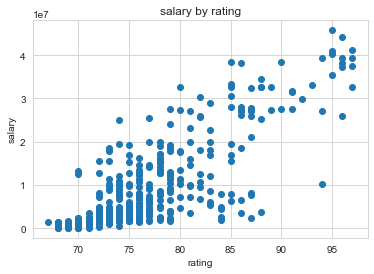

In [52]:
plt.scatter(df.rating,
            df.salary)
plt.title('salary by rating')
plt.xlabel('rating')
plt.ylabel('salary')
plt.show()

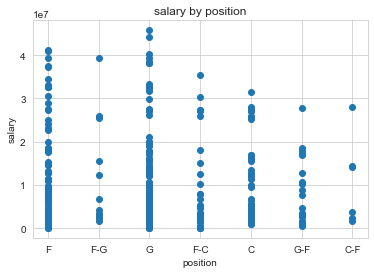

In [53]:
plt.scatter(df.position,
          df.salary)
plt.title('salary by position')
plt.xlabel('position')
plt.ylabel('salary')
plt.show()

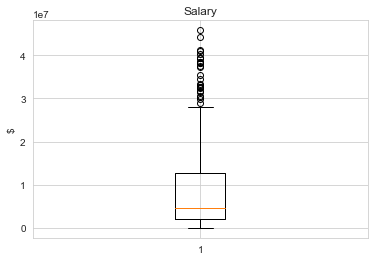

In [54]:
plt.boxplot(df.salary)
plt.title('Salary')
plt.ylabel('$')
plt.show()

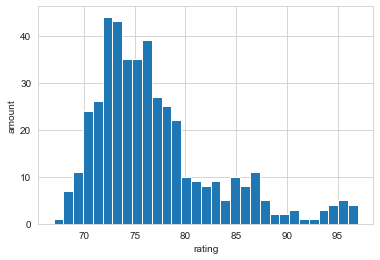

In [55]:
plt.hist(df.rating,
         bins=df.rating.nunique())
plt.xlabel('rating')
plt.ylabel('amount')
plt.show()

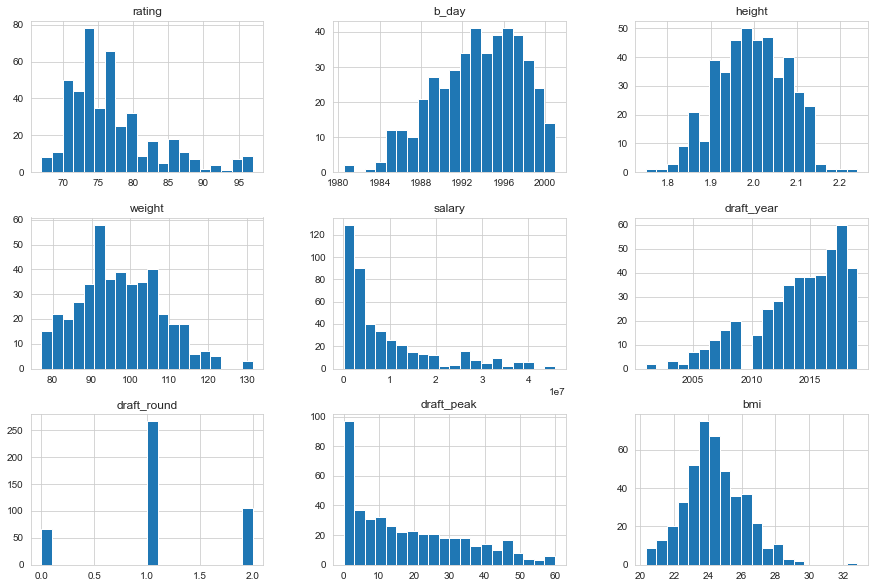

In [56]:
df.hist(figsize=(15, 10), bins=20, xlabelsize=10, ylabelsize=10)
plt.show()

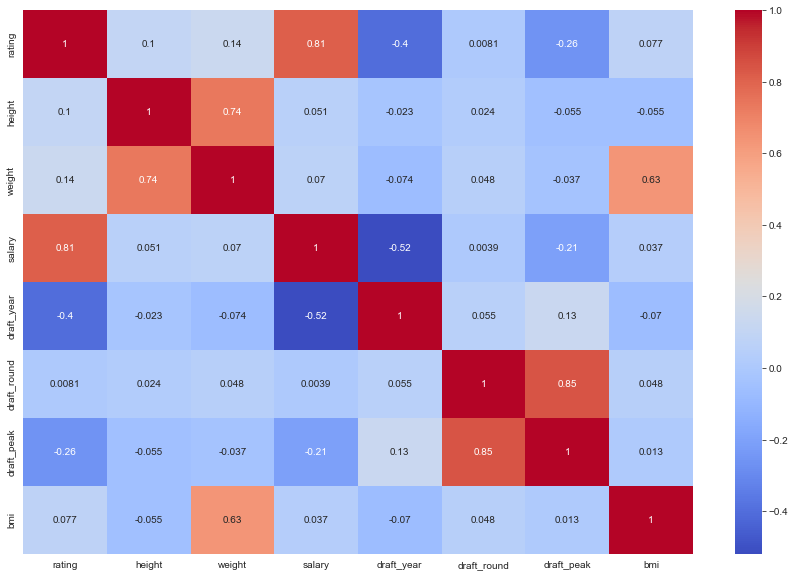

In [57]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

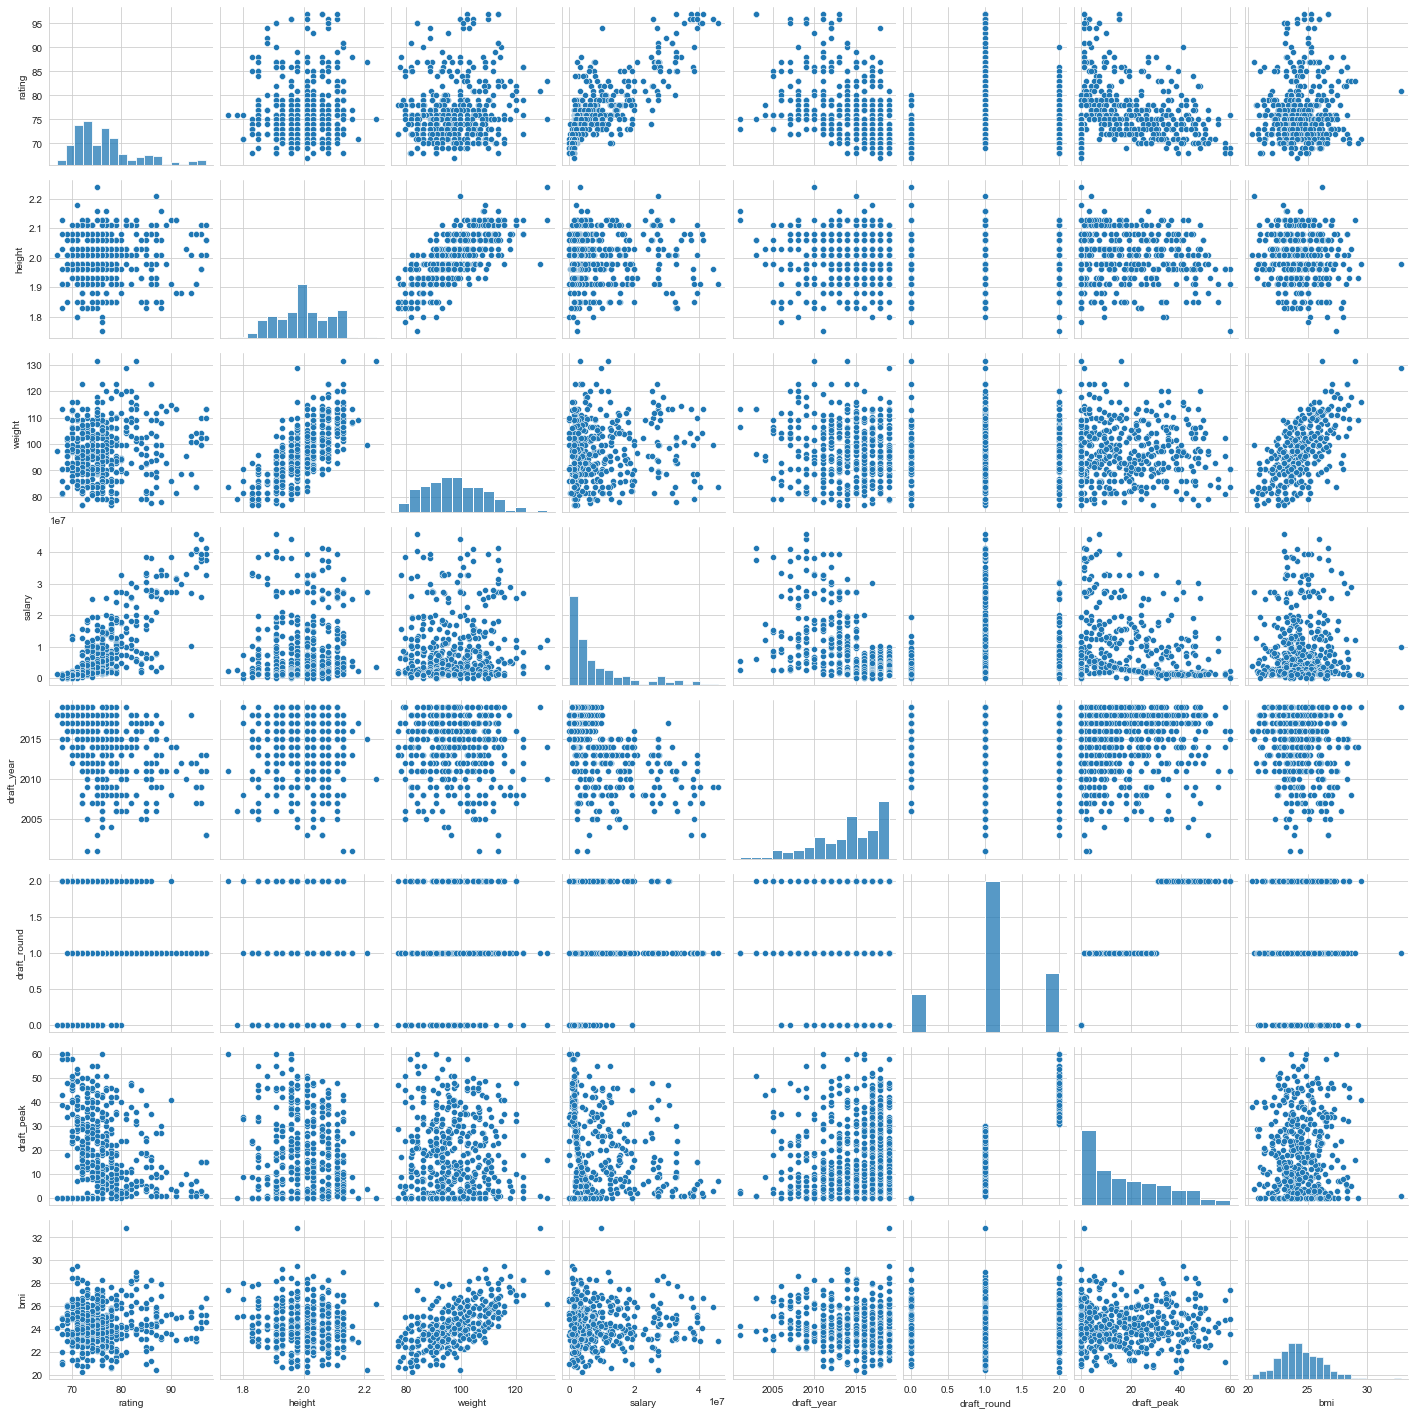

In [58]:
sns.pairplot(df)
plt.show()

**Гипотезы**

1. Чем выше рейтинг, тем выше зарплата
2. Чем раньше игрок попал на драфт(меньший год draft_year), тем выше у него зарплата(salary) 
3. Игроки на позициях F и G наиболее оплачиваемые